<a href="https://colab.research.google.com/github/jai-bhardwaj/algorithmic-trading-python/blob/main/Bharti_Airtel_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RNN Model


In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [239]:
df = pd.read_csv('Airtel.csv', index_col=['Date'], parse_dates=True)
df.head()


,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,
2021-06-02,529.90,534.6,528.0,532.90,529.5,529.50,530.22,623.0,394.0,"10,372,845","5,499,910,242.45","111,242"
2021-06-03,530.00,533.4,528.5,529.50,531.2,532.05,531.21,623.0,394.0,"6,174,103","3,279,761,456.40","112,639"
2021-06-04,533.95,535.8,531.2,532.05,532.6,532.70,533.34,623.0,394.0,"4,788,898","2,554,100,070.05","86,667"
2021-06-07,534.00,541.0,533.0,532.70,536.3,536.45,537.66,623.0,394.0,"9,496,183","5,105,741,297.30","125,647"
2021-06-08,538.10,548.0,534.0,536.45,547.5,546.80,541.30,623.0,394.0,"12,586,649","6,813,116,864.75","141,711"


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 497 entries, 2021-06-02 to 2023-06-01
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OPEN          497 non-null    float64
 1   HIGH          497 non-null    float64
 2   LOW           497 non-null    float64
 3   PREV. CLOSE   497 non-null    float64
 4   ltp           497 non-null    float64
 5   close         497 non-null    float64
 6   vwap          497 non-null    float64
 7   52W H         497 non-null    float64
 8   52W L         497 non-null    float64
 9   VOLUME        497 non-null    object 
 10  VALUE         497 non-null    object 
 11  No of trades  497 non-null    object 
dtypes: float64(9), object(3)
memory usage: 50.5+ KB


<Axes: xlabel='Date'>

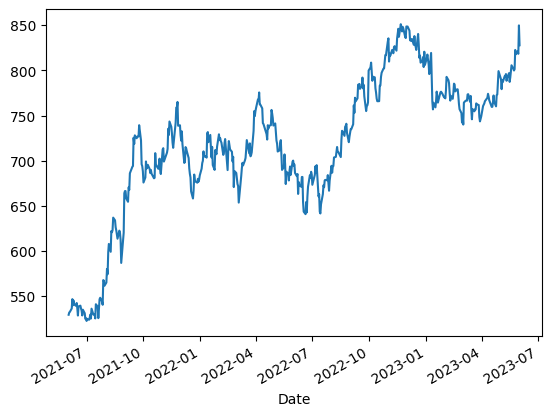

In [241]:
df['close'].plot()

In [242]:
len(df)

497

In [243]:
airtel_close = df['close']

In [244]:
airtel_close.reset_index(drop=True, inplace=True)
airtel_close.shape

(497,)

In [245]:
airtel_close = pd.DataFrame(airtel_close)

In [246]:
train = airtel_close.iloc[:480]
test = airtel_close.iloc[480:]

In [247]:
from sklearn.preprocessing import MinMaxScaler

In [248]:
scaler = MinMaxScaler()

In [249]:
scaler.fit(train)

MinMaxScaler()

In [250]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Creating the Model

In [251]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [252]:
test.shape

(17, 1)

In [253]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.preprocessing.sequence:

class TimeseriesGenerator(keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  Deprecated: `tf.keras.preprocessing.sequence.TimeseriesGenerator` does not
 |  operate on tensors and is not recommended for new code. Prefer using a
 |  `tf.data.Dataset` which provides a more efficient and flexible mechanism for
 |  batching, shuffling, and windowing input. See the
 |  [tf.data guide](https://www.tensorflow.org/guide/data) for more details.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  
 |  Arguments:
 |      data: Indexable generator (such as li

In [254]:
length = 17
batch_size = 30
generator = TimeseriesGenerator(scaled_train, scaled_train, length = length, batch_size = batch_size)

In [255]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout

In [256]:
n_features = 1

In [257]:
model = Sequential()
model.add(SimpleRNN(30,input_shape=(length, n_features)))
model.add(Dropout(rate = 0.2))
# model.add(Dense(17))
# model.add(Dense(50))
# model.add(Dense(29))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [258]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_16 (SimpleRNN)   (None, 30)                960       
                                                                 
 dropout_20 (Dropout)        (None, 30)                0         
                                                                 
 dense_46 (Dense)            (None, 1)                 31        
                                                                 
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


In [259]:
model.fit_generator(generator,epochs=30,shuffle=False)

Epoch 1/30


<ipython-input-259-4a1e14edf27a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=30,shuffle=False)


16/16 [==============================] - 3s 21ms/step - loss: 0.0516
Epoch 2/30
16/16 [==============================] - 0s 15ms/step - loss: 0.0210
Epoch 3/30
16/16 [==============================] - 0s 17ms/step - loss: 0.0168
Epoch 4/30
16/16 [==============================] - 0s 16ms/step - loss: 0.0121
Epoch 5/30
16/16 [==============================] - 0s 15ms/step - loss: 0.0105
Epoch 6/30
16/16 [==============================] - 0s 16ms/step - loss: 0.0103
Epoch 7/30
16/16 [==============================] - 0s 16ms/step - loss: 0.0092
Epoch 8/30
16/16 [==============================] - 0s 14ms/step - loss: 0.0080
Epoch 9/30
16/16 [==============================] - 0s 16ms/step - loss: 0.0079
Epoch 10/30
16/16 [==============================] - 0s 15ms/step - loss: 0.0067
Epoch 11/30
16/16 [==============================] - 0s 17ms/step - loss: 0.0070
Epoch 12/30
16/16 [==============================] - 0s 16ms/step - loss: 0.0071
Epoch 13/30
16/16 [=============================

In [260]:
losses = pd.DataFrame(model.history.history)

<Axes: >

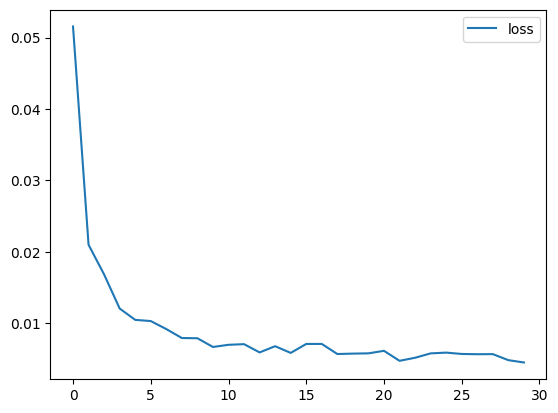

In [261]:
losses.plot()

In [262]:
first_eval_batch = scaled_train[-length:]

In [263]:
first_eval_batch = first_eval_batch.reshape((1,length,1))

In [264]:
first_eval_batch

array([[[0.7438746 ],
        [0.72135139],
        [0.72165576],
        [0.73656978],
        [0.7598539 ],
        [0.7382438 ],
        [0.7231776 ],
        [0.76076701],
        [0.76335413],
        [0.80307411],
        [0.84203318],
        [0.81433572],
        [0.78115964],
        [0.81098767],
        [0.80550905],
        [0.82514077],
        [0.82468422]]])

In [265]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 141ms/step


array([[0.8245517]], dtype=float32)

In [266]:
scaled_test[0]

array([0.83214123])

In [267]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 [==============================] - 0s 39ms/step


In [268]:
test_predictions

[array([0.8245517], dtype=float32),
 array([0.8288008], dtype=float32),
 array([0.82824486], dtype=float32),
 array([0.8389254], dtype=float32),
 array([0.84405774], dtype=float32),
 array([0.84568423], dtype=float32),
 array([0.8424325], dtype=float32),
 array([0.84685475], dtype=float32),
 array([0.85118294], dtype=float32),
 array([0.85085166], dtype=float32),
 array([0.85675055], dtype=float32),
 array([0.86472565], dtype=float32),
 array([0.86178297], dtype=float32),
 array([0.8665064], dtype=float32),
 array([0.86954445], dtype=float32),
 array([0.8726818], dtype=float32),
 array([0.87640226], dtype=float32)]

In [269]:
true_predictions = scaler.inverse_transform(test_predictions)

In [270]:
true_predictions

array([[793.55646154],
       [794.95250201],
       [794.76985038],
       [798.27894715],
       [799.96517008],
       [800.49955387],
       [799.43119752],
       [800.88412691],
       [802.30615416],
       [802.19731125],
       [804.13539251],
       [806.7556121 ],
       [805.78879415],
       [807.34067697],
       [808.33882789],
       [809.36960426],
       [810.59196215]])

In [271]:
test['predictions'] = true_predictions

<ipython-input-271-fa6c3af7c69f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_predictions


In [272]:
test

,close,predictions
480,796.05,793.556462
481,788.60,794.952502
482,791.95,794.769850
483,797.05,798.278947
484,787.35,799.965170
485,792.25,800.499554
486,799.35,799.431198
487,805.75,800.884127
488,801.85,802.306154
489,799.95,802.197311


<Axes: >

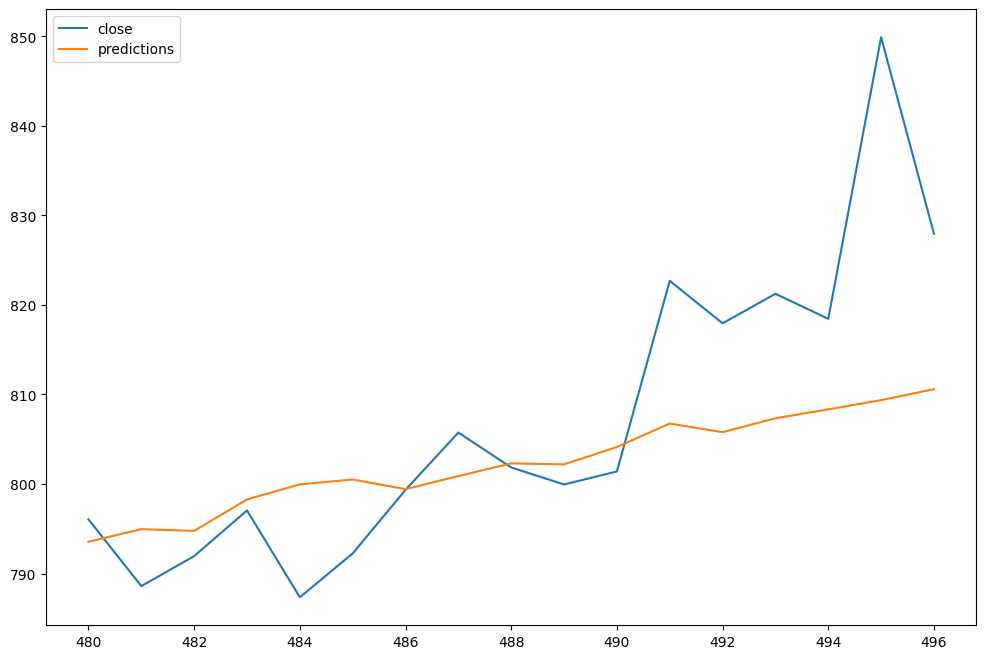

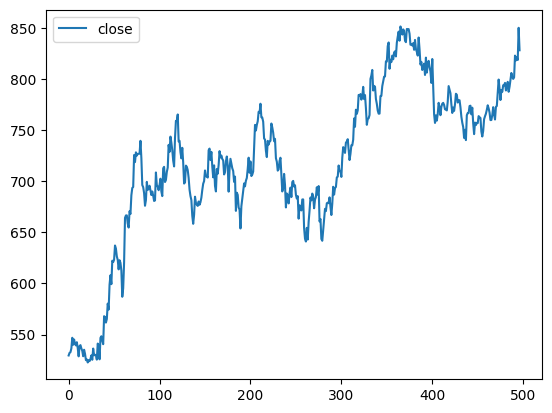

In [273]:
test.plot(figsize=(12,8))
airtel_close.plot()

#Now building model on full dataset


In [274]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(airtel_close)

In [275]:
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length = length,batch_size = 32)

In [276]:
full_model = Sequential()
full_model.add(SimpleRNN(30,input_shape=(length,n_features)))
full_model.add(Dropout(rate = 0.2))
# full_model.add(Dense(170))
# full_model.add(Dropout(rate = 0.6))
# full_model.add(Dense(500))
# full_model.add(Dropout(rate = 0.6))
# full_model.add(Dense(500))
# full_model.add(Dropout(rate = 0.398))
# full_model.add(Dense(500))
# full_model.add(Dropout(rate = 0.3))
# full_model.add(Dense(500))
# full_model.add(Dropout(rate = 0.4))
# full_model.add(Dense(290))
# full_model.add(Dropout(rate = 0.29))
# full_model.add(Dense(229))
full_model.add(Dense(1))
full_model.compile(optimizer='adam', loss='mse')

In [277]:
full_model.fit_generator(generator,epochs=30,shuffle=False)

Epoch 1/30


<ipython-input-277-e668ab5dba9a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  full_model.fit_generator(generator,epochs=30,shuffle=False)


15/15 [==============================] - 4s 18ms/step - loss: 0.7991
Epoch 2/30
15/15 [==============================] - 0s 19ms/step - loss: 0.2564
Epoch 3/30
15/15 [==============================] - 0s 20ms/step - loss: 0.0997
Epoch 4/30
15/15 [==============================] - 0s 19ms/step - loss: 0.0669
Epoch 5/30
15/15 [==============================] - 0s 19ms/step - loss: 0.0597
Epoch 6/30
15/15 [==============================] - 0s 18ms/step - loss: 0.0515
Epoch 7/30
15/15 [==============================] - 0s 18ms/step - loss: 0.0492
Epoch 8/30
15/15 [==============================] - 0s 20ms/step - loss: 0.0331
Epoch 9/30
15/15 [==============================] - 0s 18ms/step - loss: 0.0222
Epoch 10/30
15/15 [==============================] - 0s 18ms/step - loss: 0.0204
Epoch 11/30
15/15 [==============================] - 0s 19ms/step - loss: 0.0203
Epoch 12/30
15/15 [==============================] - 0s 19ms/step - loss: 0.0224
Epoch 13/30
15/15 [=============================

<Axes: >

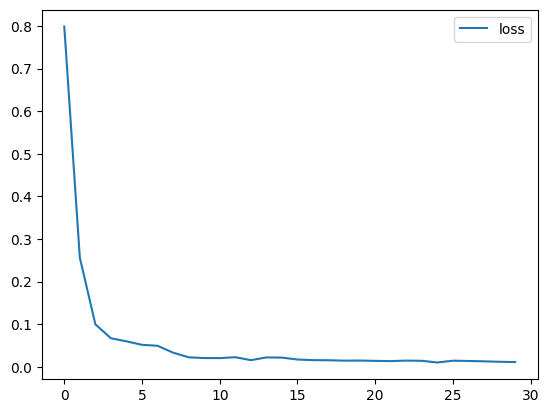

In [278]:
full_model_losses = pd.DataFrame(full_model.history.history)
full_model_losses.plot()

In [279]:
forecast = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(20):
  current_pred = model.predict(current_batch)[0]

  forecast.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 25ms/step


In [280]:
forecast = scaler.inverse_transform(forecast)

In [281]:
forecast

array([[793.55646154],
       [794.95250201],
       [794.76985038],
       [798.27894715],
       [799.96517008],
       [800.49955387],
       [799.43119752],
       [800.88412691],
       [802.30615416],
       [802.19731125],
       [804.13539251],
       [806.7556121 ],
       [805.78879415],
       [807.34067697],
       [808.33882789],
       [809.36960426],
       [810.59196215],
       [811.20109467],
       [812.65251615],
       [813.16387022]])

In [282]:
forecast.flatten()

array([793.55646154, 794.95250201, 794.76985038, 798.27894715,
       799.96517008, 800.49955387, 799.43119752, 800.88412691,
       802.30615416, 802.19731125, 804.13539251, 806.7556121 ,
       805.78879415, 807.34067697, 808.33882789, 809.36960426,
       810.59196215, 811.20109467, 812.65251615, 813.16387022])

In [283]:
df_array = np.array(airtel_close)
df_array

array([[529.5 ],
       [532.05],
       [532.7 ],
       [536.45],
       [546.8 ],
       [540.  ],
       [545.15],
       [540.85],
       [539.35],
       [542.5 ],
       [536.75],
       [528.65],
       [538.75],
       [539.6 ],
       [536.4 ],
       [534.05],
       [528.75],
       [535.1 ],
       [531.2 ],
       [524.95],
       [525.65],
       [522.65],
       [525.  ],
       [523.95],
       [526.1 ],
       [529.6 ],
       [525.3 ],
       [536.25],
       [529.65],
       [530.05],
       [530.05],
       [525.45],
       [541.15],
       [538.45],
       [525.75],
       [546.7 ],
       [548.3 ],
       [544.05],
       [540.55],
       [567.9 ],
       [567.15],
       [561.65],
       [565.15],
       [580.2 ],
       [574.4 ],
       [598.7 ],
       [607.9 ],
       [599.25],
       [622.2 ],
       [620.85],
       [623.15],
       [637.05],
       [634.05],
       [626.35],
       [622.95],
       [613.7 ],
       [622.65],
       [620.1 ],
       [612.45

In [284]:
full_data = pd.DataFrame(np.concatenate((df_array.flatten(),forecast.flatten())))

<Axes: >

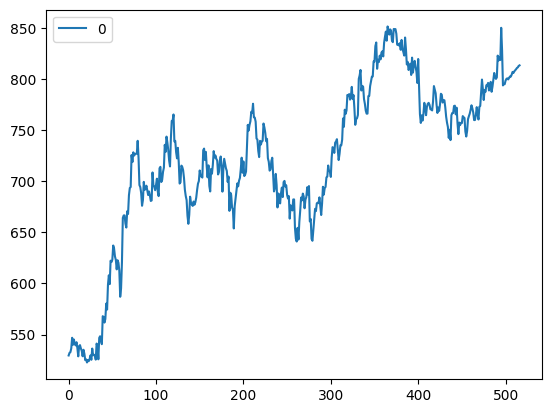

In [285]:
full_data.plot()

#LSTM Model

In [303]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [304]:
length

16

In [305]:
scaled_test.shape

(17, 1)

In [336]:
length = 16
generator = TimeseriesGenerator(scaled_train,scaled_train,length = length,batch_size = 32)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length = length,batch_size = 32)

In [337]:
lstm_model = Sequential()
lstm_model.add(LSTM(30,input_shape=(length,n_features)))
lstm_model.add(Dropout(rate = 0.2))
lstm_model.add(Dense(170))
lstm_model.add(Dropout(rate = 0.6))
lstm_model.add(Dense(500))
lstm_model.add(Dropout(rate = 0.6))
lstm_model.add(Dense(500))
lstm_model.add(Dropout(rate = 0.398))
lstm_model.add(Dense(500))
lstm_model.add(Dropout(rate = 0.3))
lstm_model.add(Dense(500))
lstm_model.add(Dropout(rate = 0.4))
lstm_model.add(Dense(290))
lstm_model.add(Dropout(rate = 0.29))
lstm_model.add(Dense(229))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

In [338]:
lstm_model.fit_generator(generator,epochs=20,validation_data=validation_generator,shuffle=False)

Epoch 1/20


<ipython-input-338-16f5b246bf59>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  lstm_model.fit_generator(generator,epochs=20,validation_data=validation_generator,shuffle=False)


15/15 [==============================] - 5s 41ms/step - loss: 0.1456 - val_loss: 0.0159
Epoch 2/20
15/15 [==============================] - 0s 11ms/step - loss: 0.0606 - val_loss: 0.0887
Epoch 3/20
15/15 [==============================] - 0s 11ms/step - loss: 0.0371 - val_loss: 0.0288
Epoch 4/20
15/15 [==============================] - 0s 10ms/step - loss: 0.0305 - val_loss: 0.0328
Epoch 5/20
15/15 [==============================] - 0s 11ms/step - loss: 0.0220 - val_loss: 0.0107
Epoch 6/20
15/15 [==============================] - 0s 10ms/step - loss: 0.0225 - val_loss: 0.0260
Epoch 7/20
15/15 [==============================] - 0s 11ms/step - loss: 0.0230 - val_loss: 0.0227
Epoch 8/20
15/15 [==============================] - 0s 11ms/step - loss: 0.0260 - val_loss: 0.0034
Epoch 9/20
15/15 [==============================] - 0s 10ms/step - loss: 0.0245 - val_loss: 8.2162e-05
Epoch 10/20
15/15 [==============================] - 0s 10ms/step - loss: 0.0264 - val_loss: 0.0031
Epoch 11/20
15/1

<Axes: >

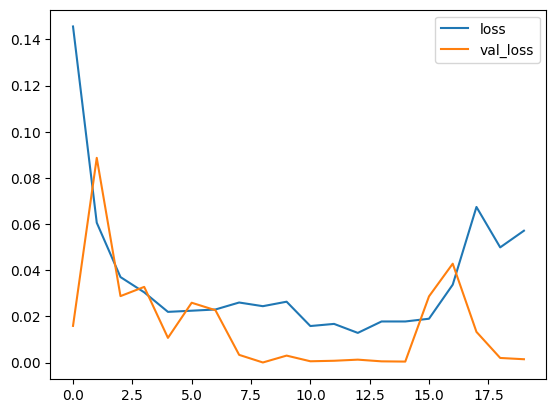

In [339]:
losses = pd.DataFrame(lstm_model.history.history)
losses.plot()

In [340]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
  current_pred = lstm_model.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 35ms/step


<ipython-input-341-5512f3d84678>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM_predictions'] = true_predictions


<Axes: >

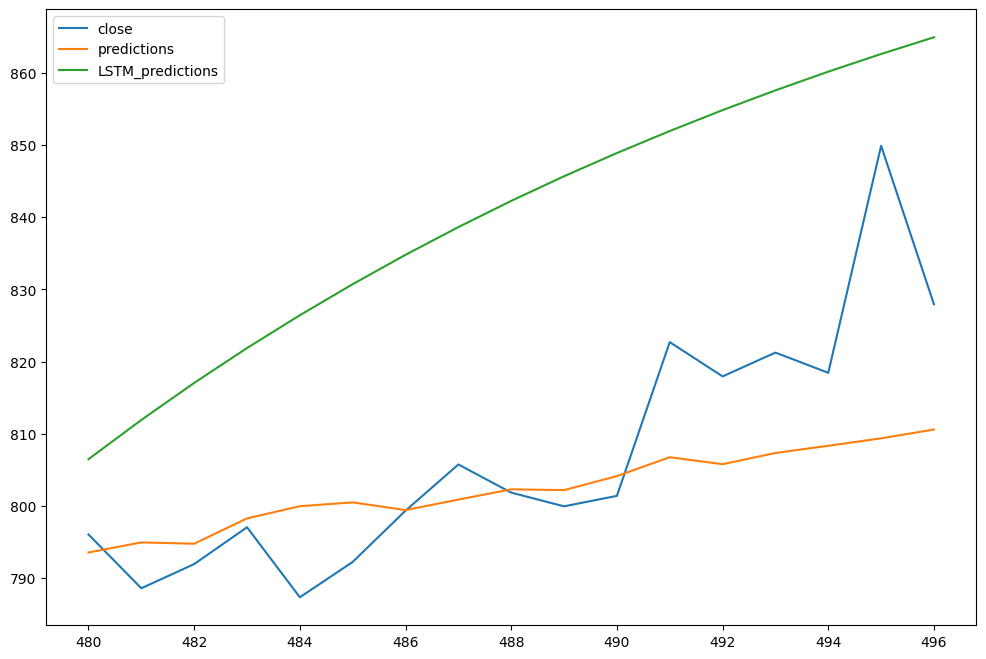

In [341]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM_predictions'] = true_predictions
test.plot(figsize=(12,8))

In [342]:
forecast = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(20):
  current_pred = lstm_model.predict(current_batch)[0]

  forecast.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 20ms/step


<Axes: >

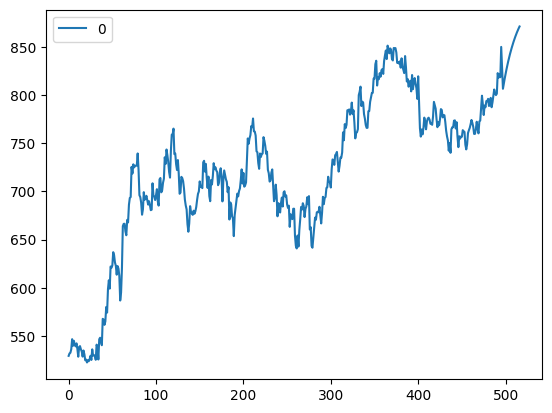

In [343]:
forecast = scaler.inverse_transform(forecast)
full_data = pd.DataFrame(np.concatenate((df_array.flatten(),forecast.flatten())))
full_data.plot()

In [344]:
forecast

array([[806.48305443],
       [811.91531013],
       [817.04688682],
       [821.87794116],
       [826.4254713 ],
       [830.72688096],
       [834.79924661],
       [838.63675207],
       [842.2654037 ],
       [845.68232279],
       [848.89634132],
       [851.94482386],
       [854.84371104],
       [857.57868763],
       [860.17043338],
       [862.61702915],
       [864.93288811],
       [867.10904118],
       [869.15872656],
       [871.08821083]])